## Exe River Flow Analysis

# Introduction and Reading in Data


Now you know some of the basics of R, we will now start analysing some data. To begin with, we will look at plotting up and analysing some flow data from the river Exe, specifically gauged daily flow at Trews Wier.

We are using a notebook for this. It allows text like this to explain what is happening in the code, interspaced with blocks of code which can be run by clicking the play button at the side of them, with the output from that block being shown underneath. Furthermore, the code within the blocks can be edited, allowing you to test different things yourself. Suggested changes that you may want to do to the code are shown in **bold**. However please do also play around with your own ideas too!

The data is provided as a .csv file at: https://nrfa.ceh.ac.uk/data/station/info/45007. Information on the dataset can be found here, with a link to download the .csv file on the 'Daily flow data' tab, and then by clicking 'Download flow data'. It will be called '45007_gdf.csv'.

Opening this .csv file in Excel, you can see it has a lot of information at the top, and then two columns for the data, showing the date and the flow. We first need to upload the file so we can use it here. This is done by clicking the folder icon on the left-hand side here and then the upload icon (first one out of the four along top of the window that comes out, directly below 'Files'. For simplicity we will add it to the 'content' folder, by clicking and dragging it into there. This is the default directory for R here.

To read in the file, we will use the `read.csv()` function, skipping the first 20 lines which has all the information in it at the top (skip=20) and we will tell R that there are no headers (header=F, for 'FALSE'), so it will not look to put names at the top of the columns as there are none in the .csv file. Finally we will use the head() function to check the top of the data that we have loaded in, to check that everything looks good and as expected!

In [ ]:
riv_table <- read.csv('45007_gdf.csv', skip=20, header=F)
head(riv_table)

,V1,V2
,<chr>,<dbl>
1,1996-11-08,50.4
2,1996-11-09,45.8
3,1996-11-10,43.4
4,1996-11-11,34.2
5,1996-11-12,28.3
6,1996-11-13,23.4


Everything should look good. We can make a data frame of this table, which allows R to understand the dates in the left column as actual dates (currently they are 'strings'), and we can give the columns names to help with understanding data quickly.

For this we use the `data.frame()` function, creating columns called 'date' and 'flow' and assigning them the first column of the table with the `as.Date()` function to turn those strings into dates, and the second column for the flow rates. Checking how it looks with the `head()` function again you can see that we now have headings for the columns and the 'class' of the first column has changed to 'date'. Now we can plot...

In [ ]:
riv_data <- data.frame('date'=as.Date(riv_table[,1]), 'flow'=riv_table[,2])
head(riv_data)

,date,flow
,<date>,<dbl>
1,1996-11-08,50.4
2,1996-11-09,45.8
3,1996-11-10,43.4
4,1996-11-11,34.2
5,1996-11-12,28.3
6,1996-11-13,23.4


# Plotting

We can plot the data in the most simple way now using `plot()` like below:

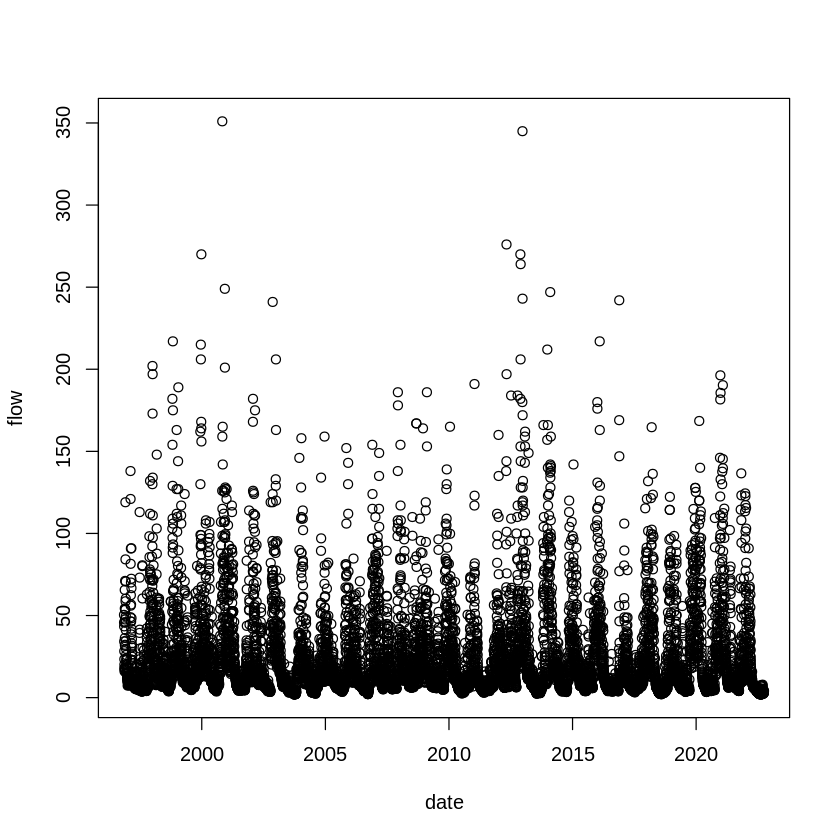

In [ ]:
plot(riv_data)

You can see that the dates have worked correctly, and the axis have been labelled to the names of the columns. However we can make this tidier, and make a line plot rather than using points as is the default in R.

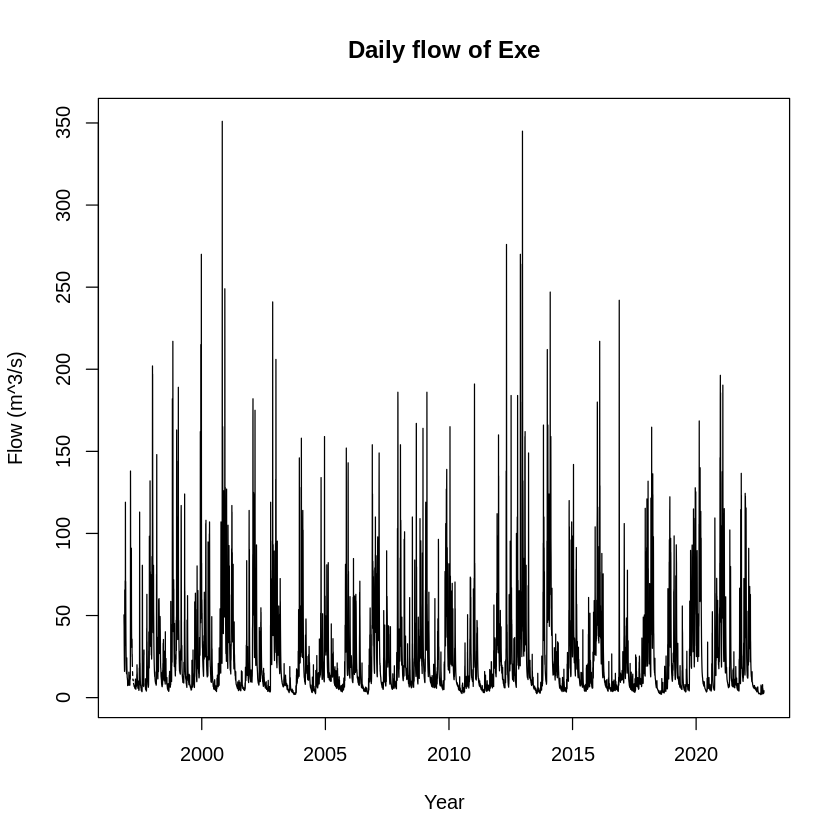

In [ ]:
plot(riv_data, type='l', main='Daily flow of Exe', xlab='Year', ylab='Flow (m^3/s)')

As we have learned from the basics of R, using type='l' in the `plot()` function makes it plot a line, and we have added a main, x axis label and y axis label that looks better.

**Try and change the colour and/or style of the line by updating the code in the block above and rerunning it.**

# Monthly Averages

Above we have looked at the daily time series, which is quite noisy or jumpy. It could be clearer to see any trends in the data by looking at the mean daily flow values over each month instead. To do this we will use a for loop that loops over each individual year and month string from the date column (e.g. 1996-11 or 2008-07) and takes an average of the flow values that have dates that start with year and month combination.

To begin with, we need to determine the different months to loop over. For this, is it probably easier to go back to the string from the original table rather than the dates objects as these strings are easier to work with.

We use the `substr()` function which takes in an string or vector of strings and two numbers and returns the characters in the strings that are between the positions. We want the characters in positions 1 to 7 (XXXX-XX, remember the dash is a character too). Then, for our for loop we do not want repeats, we only want to unique values that are returned:

In [ ]:
months <- unique(substr(riv_table[,1], 1, 7))
print(months)

  [1] "1996-11" "1996-12" "1997-01" "1997-02" "1997-03" "M"       "1997-04"
  [8] "1997-05" "1997-06" "1997-07" "1997-08" "1997-09" "1997-10" "1997-11"
 [15] "1997-12" "1998-01" "1998-02" "1998-03" "1998-04" "1998-05" "1998-06"
 [22] "1998-07" "1998-08" "1998-09" "1998-10" "1998-11" "1998-12" "1999-01"
 [29] "1999-02" "1999-03" "1999-04" "1999-05" "1999-06" "1999-07" "1999-08"
 [36] "1999-09" "1999-10" "1999-11" "1999-12" "2000-01" "2000-02" "2000-03"
 [43] "2000-04" "2000-05" "2000-06" "2000-07" "2000-08" "2000-09" "2000-10"
 [50] "2000-11" "2000-12" "2001-01" "2001-02" "2001-03" "2001-04" "2001-05"
 [57] "2001-06" "2001-07" "2001-08" "2001-09" "2001-10" "2001-11" "2001-12"
 [64] "2002-01" "2002-02" "2002-03" "2002-04" "2002-05" "2002-06" "2002-07"
 [71] "2002-08" "2002-09" "2002-10" "2002-11" "2002-12" "2003-01" "2003-02"
 [78] "2003-03" "2003-04" "2003-05" "2003-06" "2003-07" "2003-08" "2003-09"
 [85] "2003-10" "2003-11" "2003-12" "2004-01" "2004-02" "2004-03" "2004-04"
 [92] "2004-

You will see what the combination of `unique()` and `substr()` has done from the output above. However, notice that there is an 'M' in the 6th position. Looking back at the original .csv file or in the riv_table object here, you will see that appears to be linked to where there is missing data. We will remove this for our for loop, otherwise we will get missing data in the middle of our monthly time series when we actually want what is in April 1997 after March 1997. We can remove this like we have learned in the basics:

In [ ]:
months_fixed <- months[-6]
print(months_fixed)

  [1] "1996-11" "1996-12" "1997-01" "1997-02" "1997-03" "1997-04" "1997-05"
  [8] "1997-06" "1997-07" "1997-08" "1997-09" "1997-10" "1997-11" "1997-12"
 [15] "1998-01" "1998-02" "1998-03" "1998-04" "1998-05" "1998-06" "1998-07"
 [22] "1998-08" "1998-09" "1998-10" "1998-11" "1998-12" "1999-01" "1999-02"
 [29] "1999-03" "1999-04" "1999-05" "1999-06" "1999-07" "1999-08" "1999-09"
 [36] "1999-10" "1999-11" "1999-12" "2000-01" "2000-02" "2000-03" "2000-04"
 [43] "2000-05" "2000-06" "2000-07" "2000-08" "2000-09" "2000-10" "2000-11"
 [50] "2000-12" "2001-01" "2001-02" "2001-03" "2001-04" "2001-05" "2001-06"
 [57] "2001-07" "2001-08" "2001-09" "2001-10" "2001-11" "2001-12" "2002-01"
 [64] "2002-02" "2002-03" "2002-04" "2002-05" "2002-06" "2002-07" "2002-08"
 [71] "2002-09" "2002-10" "2002-11" "2002-12" "2003-01" "2003-02" "2003-03"
 [78] "2003-04" "2003-05" "2003-06" "2003-07" "2003-08" "2003-09" "2003-10"
 [85] "2003-11" "2003-12" "2004-01" "2004-02" "2004-03" "2004-04" "2004-05"
 [92] "2004-

Now we have this set of months, we can make a for loop to create these averages. There are 3 steps to this:

1) Create a vector to store the monthly values in that is the same length as the number of months we have.

2) Within the for loop, check which substring of the riv_table date strings have the year and month combination we want which a which statement

3) Take the mean of the flows (column 2 in the riv_table object) on those rows we have just calculated and store it in our object we made above. Note that `na.rm=T` (TRUE) will ignore any missing data, which would mess up our average.

In [ ]:
mon_flow <- rep(NA, length(months_fixed)) #set up a vector to store the monthly averages in
for (i in 1:length(months_fixed)) { #do a for loop that for each value of i in 1 to the length of how many individual months there are...
	month_inds <- which(substr(riv_table[,1], 1, 7) == months_fixed[i]) #...see which rows in the table are in that month (which characters 1-7 of dates/first column match the unique string we found)...
	mon_flow[i] <- mean(riv_table[month_inds,2], na.rm=T) #... and for those rows take a mean of the second column and store it in the 'i' position of the vector
}

Now we have this object, we can create a data frame like before, of these monthly means:

In [ ]:
month4plot <- as.Date(paste(months_fixed,'-15',sep=''), format='%Y-%m-%d') #you can set your date up like this using the as.Date() function for the 15th of each month, pasting '-15' to the end of each of the unique month strings

riv_mon_data <- data.frame('date'=month4plot, 'flow'=mon_flow)


And plot as before:

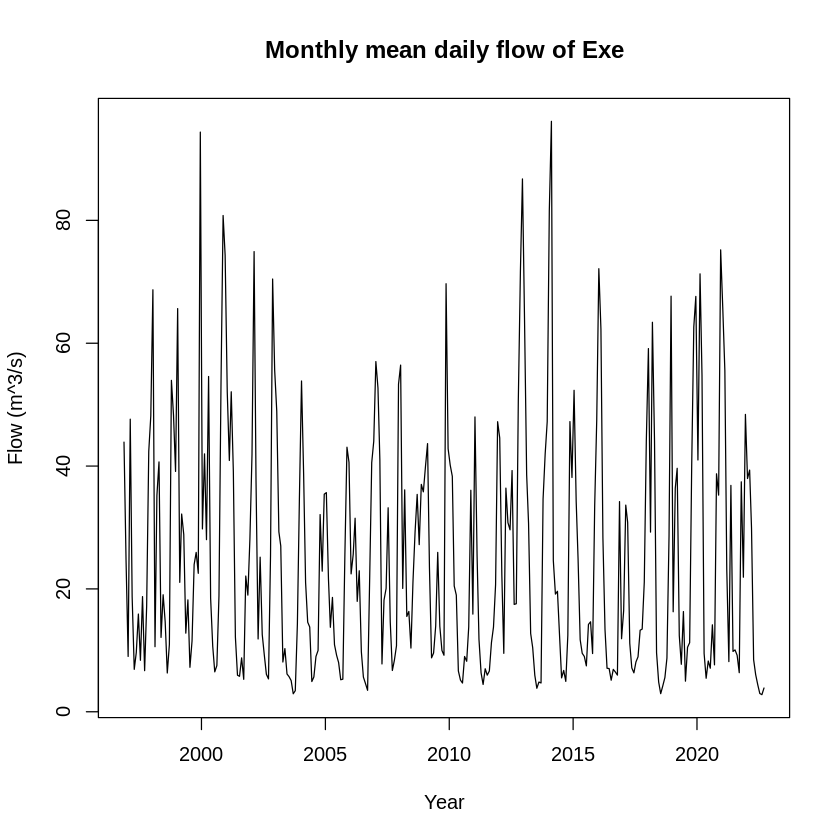

In [ ]:
plot(riv_mon_data, type='l', main='Monthly mean daily flow of Exe', xlab='Year', ylab='Flow (m^3/s)')

**How would you add the original daily data on in a different colour on top of this? (Consider the `lines()` function and the ylim of the plot! ylim is actually used further down so you may want to come back to this afterwards)**

# Creating a Mean Annual Cycle

In some cases we may be interested in what the average year looks like, or the mean annual cycle. This is achieved by taking the mean across the whole dataset for all Januaries, Februaries, Marches etc. We already know what the unique month values look like, it is easier than the year-month combinations from above:

In [ ]:
month_labs <- c('01','02','03','04','05','06','07','08','09',10:12)
print(month_labs)


 [1] "01" "02" "03" "04" "05" "06" "07" "08" "09" "10" "11" "12"


Note we couldn't just do `month_labs <- c(1:12)` as we are looking specifically for '01' and '02', etc. Now we do a for loop very similar to last time, except we are looking for the substr values for 6 to 7 in the dates this time, rather than 1 to 7. We will also calculate the standard deviation alongside the mean, otherwise this for loop should look very familiar:

In [ ]:
month_avg <- rep(NA, 12)
month_sd <- rep(NA, 12)
for (i in 1:12) {
	month_inds <- which(substr(riv_table[,1], 6, 7) == month_labs[i])
	month_avg[i] <- mean(riv_table[month_inds,2], na.rm=T)
	month_sd[i] <- sd(riv_table[month_inds,2], na.rm=T)
}
print(month_avg)
print(month_sd)

 [1] 46.932543 40.470463 30.517453 18.684609 13.605241 10.879878 10.197156
 [8]  9.854552 10.080990 24.161654 39.211710 48.030906
 [1] 35.966560 31.738845 24.623007 20.749245 13.869968 10.787210 13.402739
 [8]  9.404615 13.005964 29.087677 34.566430 40.331461


The printed outputs at the end show the 12 mean values and then the 12 standard deviations. It would be clearer to plot these of course, which we will do with specific labels on the x-axis:

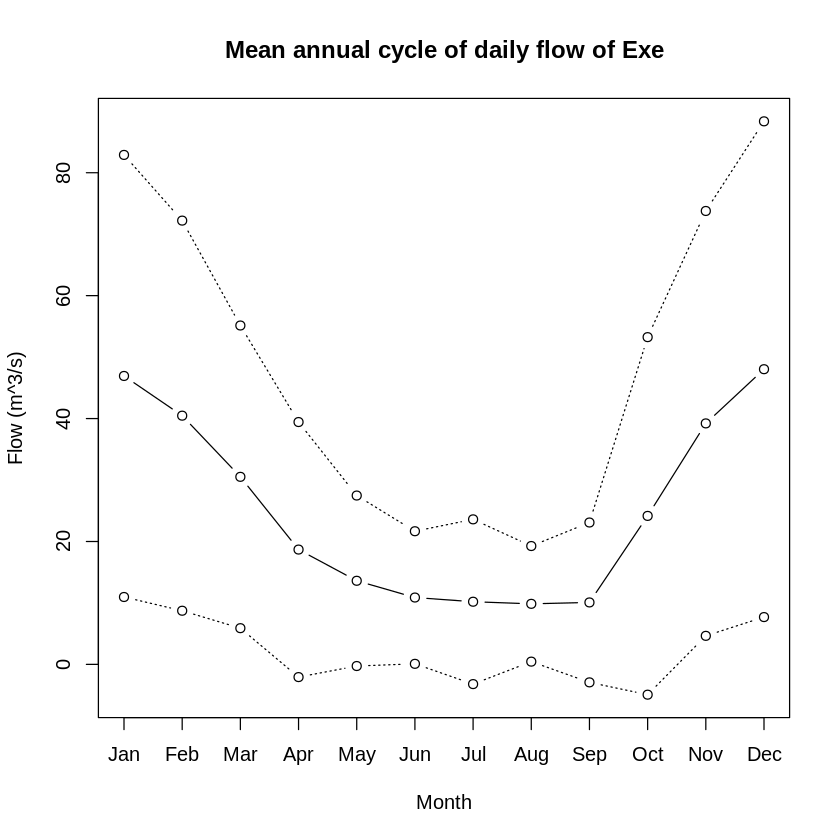

In [ ]:
monthlabs4plot <- c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec') #plotting labels for x axis

plot(month_avg, type='b', main='Mean annual cycle of daily flow of Exe', xlab='Month', ylab='Flow (m^3/s)', xaxt='n', ylim=range(c(month_avg+month_sd,month_avg-month_sd))) #plot sets the y axis range to fit in the mean +/- sd
lines(month_avg+month_sd, type='b', lty=3) #dotted lines (lty=3) are added for the +/- sd
lines(month_avg-month_sd, type='b', lty=3)
axis(1, at=c(1:12), labels=monthlabs4plot) #make a nice axis


Note that we changed the y-axis range so it fits the +/- sd lines in. The argument type='b' plots both lines and points. **Try and change the style of the points using the pch argument and add a legend with the legend() function. You may have to google these for help!**

# Box and Whisker Plots

You may want to present this data in a different way, with a box and whisker plot for example. To do this, we need to append the month onto our riv_data data frame using the dollar sign notation. The below creates a new column called 'month' to the data frame and assigns one of the labels we used for plotting above, based on the '01', '02' etc part of the date. The `head()` line shows the top of this (which all coincides with November).

Then, mainly because R needs explicitly telling these things, we need to turn these labels into 'factors' which in reality just tells R to plot the box plot in the correct year order (else it would plot the months alphabetically). For the second `head()` output you can see that all that has changed is now the third column has 'fct' for factor above it.

Finally, we create the box plot with the `boxplot()` function which works similarly to the normal `plot()` function. Here we are telling R to make boxes based on the flow, separated by month.

,date,flow,month
,<date>,<dbl>,<chr>
1,1996-11-08,50.4,Nov
2,1996-11-09,45.8,Nov
3,1996-11-10,43.4,Nov
4,1996-11-11,34.2,Nov
5,1996-11-12,28.3,Nov
6,1996-11-13,23.4,Nov


,date,flow,month
,<date>,<dbl>,<fct>
1,1996-11-08,50.4,Nov
2,1996-11-09,45.8,Nov
3,1996-11-10,43.4,Nov
4,1996-11-11,34.2,Nov
5,1996-11-12,28.3,Nov
6,1996-11-13,23.4,Nov


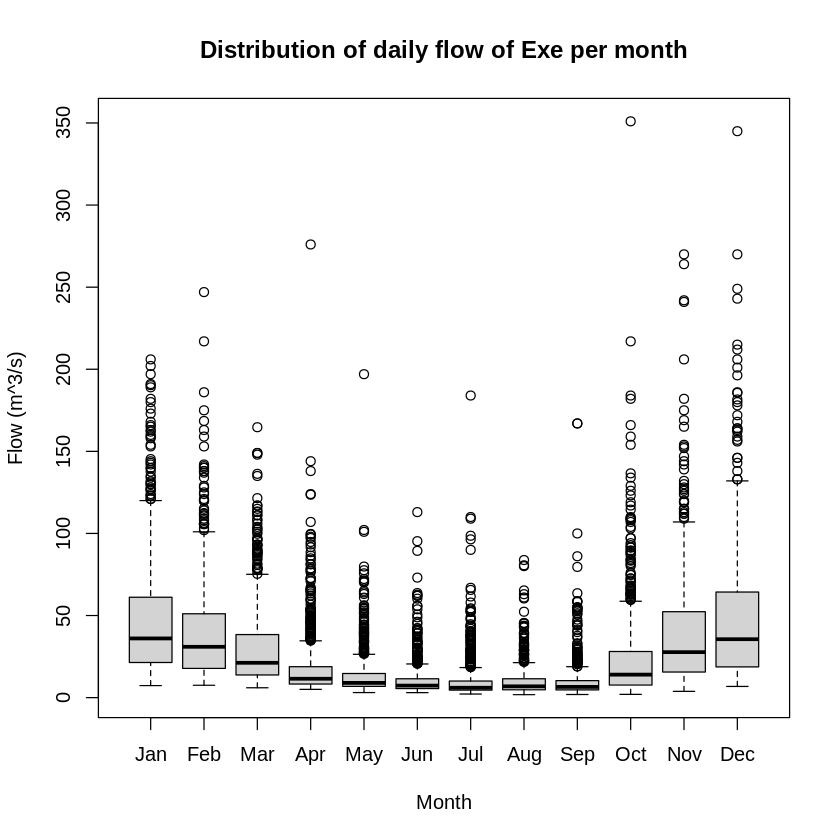

In [ ]:
riv_data$month <- monthlabs4plot[as.numeric(substr(riv_data$date, 6, 7))] #add a new columnn to the original data frame that uses the labels from above and looks at which month in the in the date string in each line
head(riv_data)
riv_data$month <- factor(riv_data$month, levels=c('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')) #this needs to be done to make sure it plots in the correct order
head(riv_data)
boxplot(flow ~ month, data=riv_data, main='Distribution of daily flow of Exe per month', xlab='Month', ylab='Flow (m^3/s)') #this makes the boxplot of flow values based on month in the dataset


You will notice a number of points above the whiskers which are considered by R as outliers (they lie outside a certain range from the mean values to be considered as part of the whiskers). At the start, it was noted that the daily data was very noisy which is what causes this. We could fix this by using the monthly data frame we created earlier. **Use the code block below to alter the monthly data frame we made and make another box plot which will not be as noisy. Your code block should look similar to the one above.**

In [ ]:
# Use this code block for the above suggestion


# Other Statistics

There are other statistics that can be calculated on the data. Using some of the skills from the R basics we learned earlier:

In [ ]:
riv_data$date[which.min(riv_data$flow)] #finds the date at the index where the minimum flow is


[1] "2022-08-14"

**Adapt the above code block to determine:**

**1) The date of the maximum flow**

**2) The month with the minimum average flow**

**3) The month with the maximum average flow**


